## Primeiro tratamento de dados

Aqui carregam-se os dois primeiros datasets. O de Paises e depois o de coffee. O de Coffee não é o inicialmente proposto já que esse se revelou mau.
Este também é limitado (tem a UE agrupada o que impede a analise de paises como o nosso) mas é muito mais assertivo.

In [7]:
import pandas as pd

# Load the dataset into a DataFrame
dfCountries = pd.read_csv('Dados/countries of the world.csv')

# Display the first few rows of the DataFrame
dfCountries.head()

dfCoffee = pd.read_csv('Dados/psd_coffee.csv')
dfCoffee.head()

dfCoffee_grouped = dfCoffee[dfCoffee['Attribute_Description'] == 'Domestic Consumption'].groupby('Country_Name').sum()
dfCoffee_avg = dfCoffee.groupby(['Country_Name', 'Attribute_Description'])['Value'].mean().reset_index()
dfCoffee_filtered = dfCoffee_avg[dfCoffee_avg['Attribute_Description'] == 'Domestic Consumption']
#Change the column named Value to Coffee Domestic Consumption
dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)
dfCoffee_filtered.head()
dfCoffee_filtered.to_csv('DadosTratados/CoffeeTreated.csv', index=False)

#TODO: Congo e brazzaville need work

/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_48661/435664159.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)


## Juntar os dois

Faz-se algum tratamento e depois juntam-se os dataframes

In [8]:
# Rename the 'Country' column in dfCountries to 'Country_Name'
dfCountries.rename(columns={'Country': 'Country_Name'}, inplace=True)

# Ensure consistent formatting for merging
dfCountries['Country_Name'] = dfCountries['Country_Name'].str.strip().str.lower()
dfCoffee_filtered['Country_Name'] = dfCoffee_filtered['Country_Name'].str.strip().str.lower()

# Merge the two DataFrames
dfMerged = pd.merge(dfCountries, dfCoffee_filtered, how='inner', on='Country_Name')

# Display the first few rows of the merged DataFrame
dfMerged.head()
dfMerged.to_csv('DadosTratados/Merged.csv', index=False)

/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_48661/3994400753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered['Country_Name'] = dfCoffee_filtered['Country_Name'].str.strip().str.lower()


## Carregar a felicidade

Carrega-se o dataset de felicidade, trata-se e juntam-se todos os dados

In [17]:
dfHappiness = pd.read_csv('Dados/worldhappinessreport/2019.csv')
#Rename the column named 'Country (region)' to 'Country_Name'
dfHappiness.rename(columns={'Country or region': 'Country_Name'}, inplace=True)
#Ensure consistent formatting for merging
dfHappiness['Country_Name'] = dfHappiness['Country_Name'].str.strip().str.lower()
#Merge the happiness dataset with the merged dataset
dfMergedHappiness = pd.merge(dfMerged, dfHappiness, how='inner', on='Country_Name')
#Remove the column named "Atribute_Description"
dfMergedHappiness.drop(columns='Attribute_Description', inplace=True)
#Show the first few rows of the merged dataset
dfMergedHappiness.head()



,Country_Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Service,Coffee Domestic Consumption,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"0,298",2094.736842,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
1,argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,"0,547",730.315789,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
2,australia,OCEANIA,20264082,7686850,"2,6","0,34","3,98","4,69",29000.0,"100,0",...,"0,7",1505.000000,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290
3,benin,SUB-SAHARAN AFRICA,7862944,112620,"69,8","0,11",0,85,1100.0,"40,9",...,"0,546",0.660000,102,4.883,0.393,0.437,0.397,0.349,0.175,0.082
4,bolivia,LATIN AMER. & CARIB,8989046,1098580,"8,2","0,00","-1,32","53,11",2400.0,"87,2",...,"0,52",42.770492,61,5.779,0.776,1.209,0.706,0.511,0.137,0.064


## Demonstrar os dados graficamente

Aqui faço alguns gráficos que considero interessantes.

### Plot
Neste é visivel que não existe relação entre o consumo de café e a felicidade

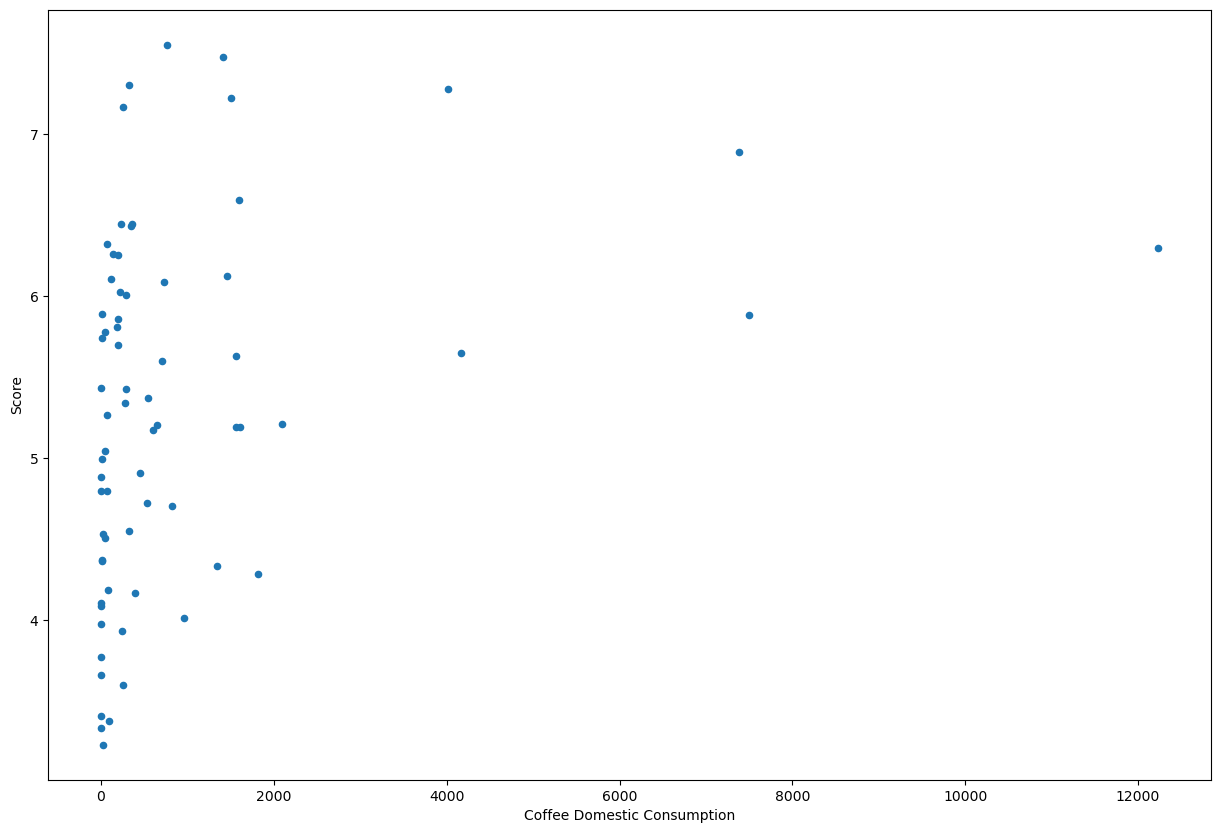

In [20]:
import matplotlib.pyplot as plt
#Compare with a plotter graph both the coffe consumption and the happiness score
dfMergedHappiness.plot(x='Coffee Domestic Consumption', y='Score', kind='scatter', figsize=(15, 10))
plt.show()